In [5]:
# -*- coding: utf-8 -*- 
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import proplot as pplt
import missingno as msno
mpl.rcParams.update(
    {
    'font.family': 'sans-serif',            #设置字体样式
    'font.size':16,
    'font.sans-serif': ['SimHei'],        
    'axes.labelsize': 16,
    'xtick.labelsize':16,
    'ytick.labelsize':16}
    )          
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

#### 表面风化与其余特征统计分析

In [6]:
# 数据读取
data = pd.read_excel(r'../数据/附件.xlsx', sheet_name= '表单1').iloc[:, 1:]
# 统计分析表1特征
data_K = data[data['表面风化'] == '风化'].drop(columns= '表面风化')
data_Pb = data[data['表面风化'] == '无风化'].drop(columns= '表面风化')
#高钾玻璃
K_dec = data_K.groupby(by= '纹饰').size()
K_color = data_K.groupby(by= '颜色').size()
K_cloud = data_K.groupby(by= '类型').size()
#铅钡玻璃
Pb_dec = data_Pb.groupby(by= '纹饰').size()
Pb_color = data_Pb.groupby(by= '颜色').size()
Pb_cloud = data_Pb.groupby(by= '类型').size()
#合并
dec = pd.DataFrame(data= {'cloud':K_dec/len(data_K), 'no cloud':Pb_dec/len(data_Pb)}).fillna(0).reset_index()   #重置索引
color = pd.DataFrame(data= {'cloud':K_color/len(data_K), 'no cloud':Pb_color/len(data_Pb)}).fillna(0).reset_index()
cloud = pd.DataFrame(data= {'cloud':K_cloud/len(data_K), 'no cloud':Pb_cloud/len(data_Pb)}).fillna(0).reset_index()
dec.index = dec.iloc[:, 0].values
color.index = color.iloc[:, 0].values
cloud.index = cloud.iloc[:, 0].values
dec.drop(columns='纹饰', inplace= True)
color.drop(columns='颜色', inplace= True)
cloud.drop(columns='类型', inplace= True)

C:\Users\syh\AppData\Local\Temp/ipykernel_8112/1738504398.py:15: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.legend(loc='best',ncols=2,  prop={'size': 12})


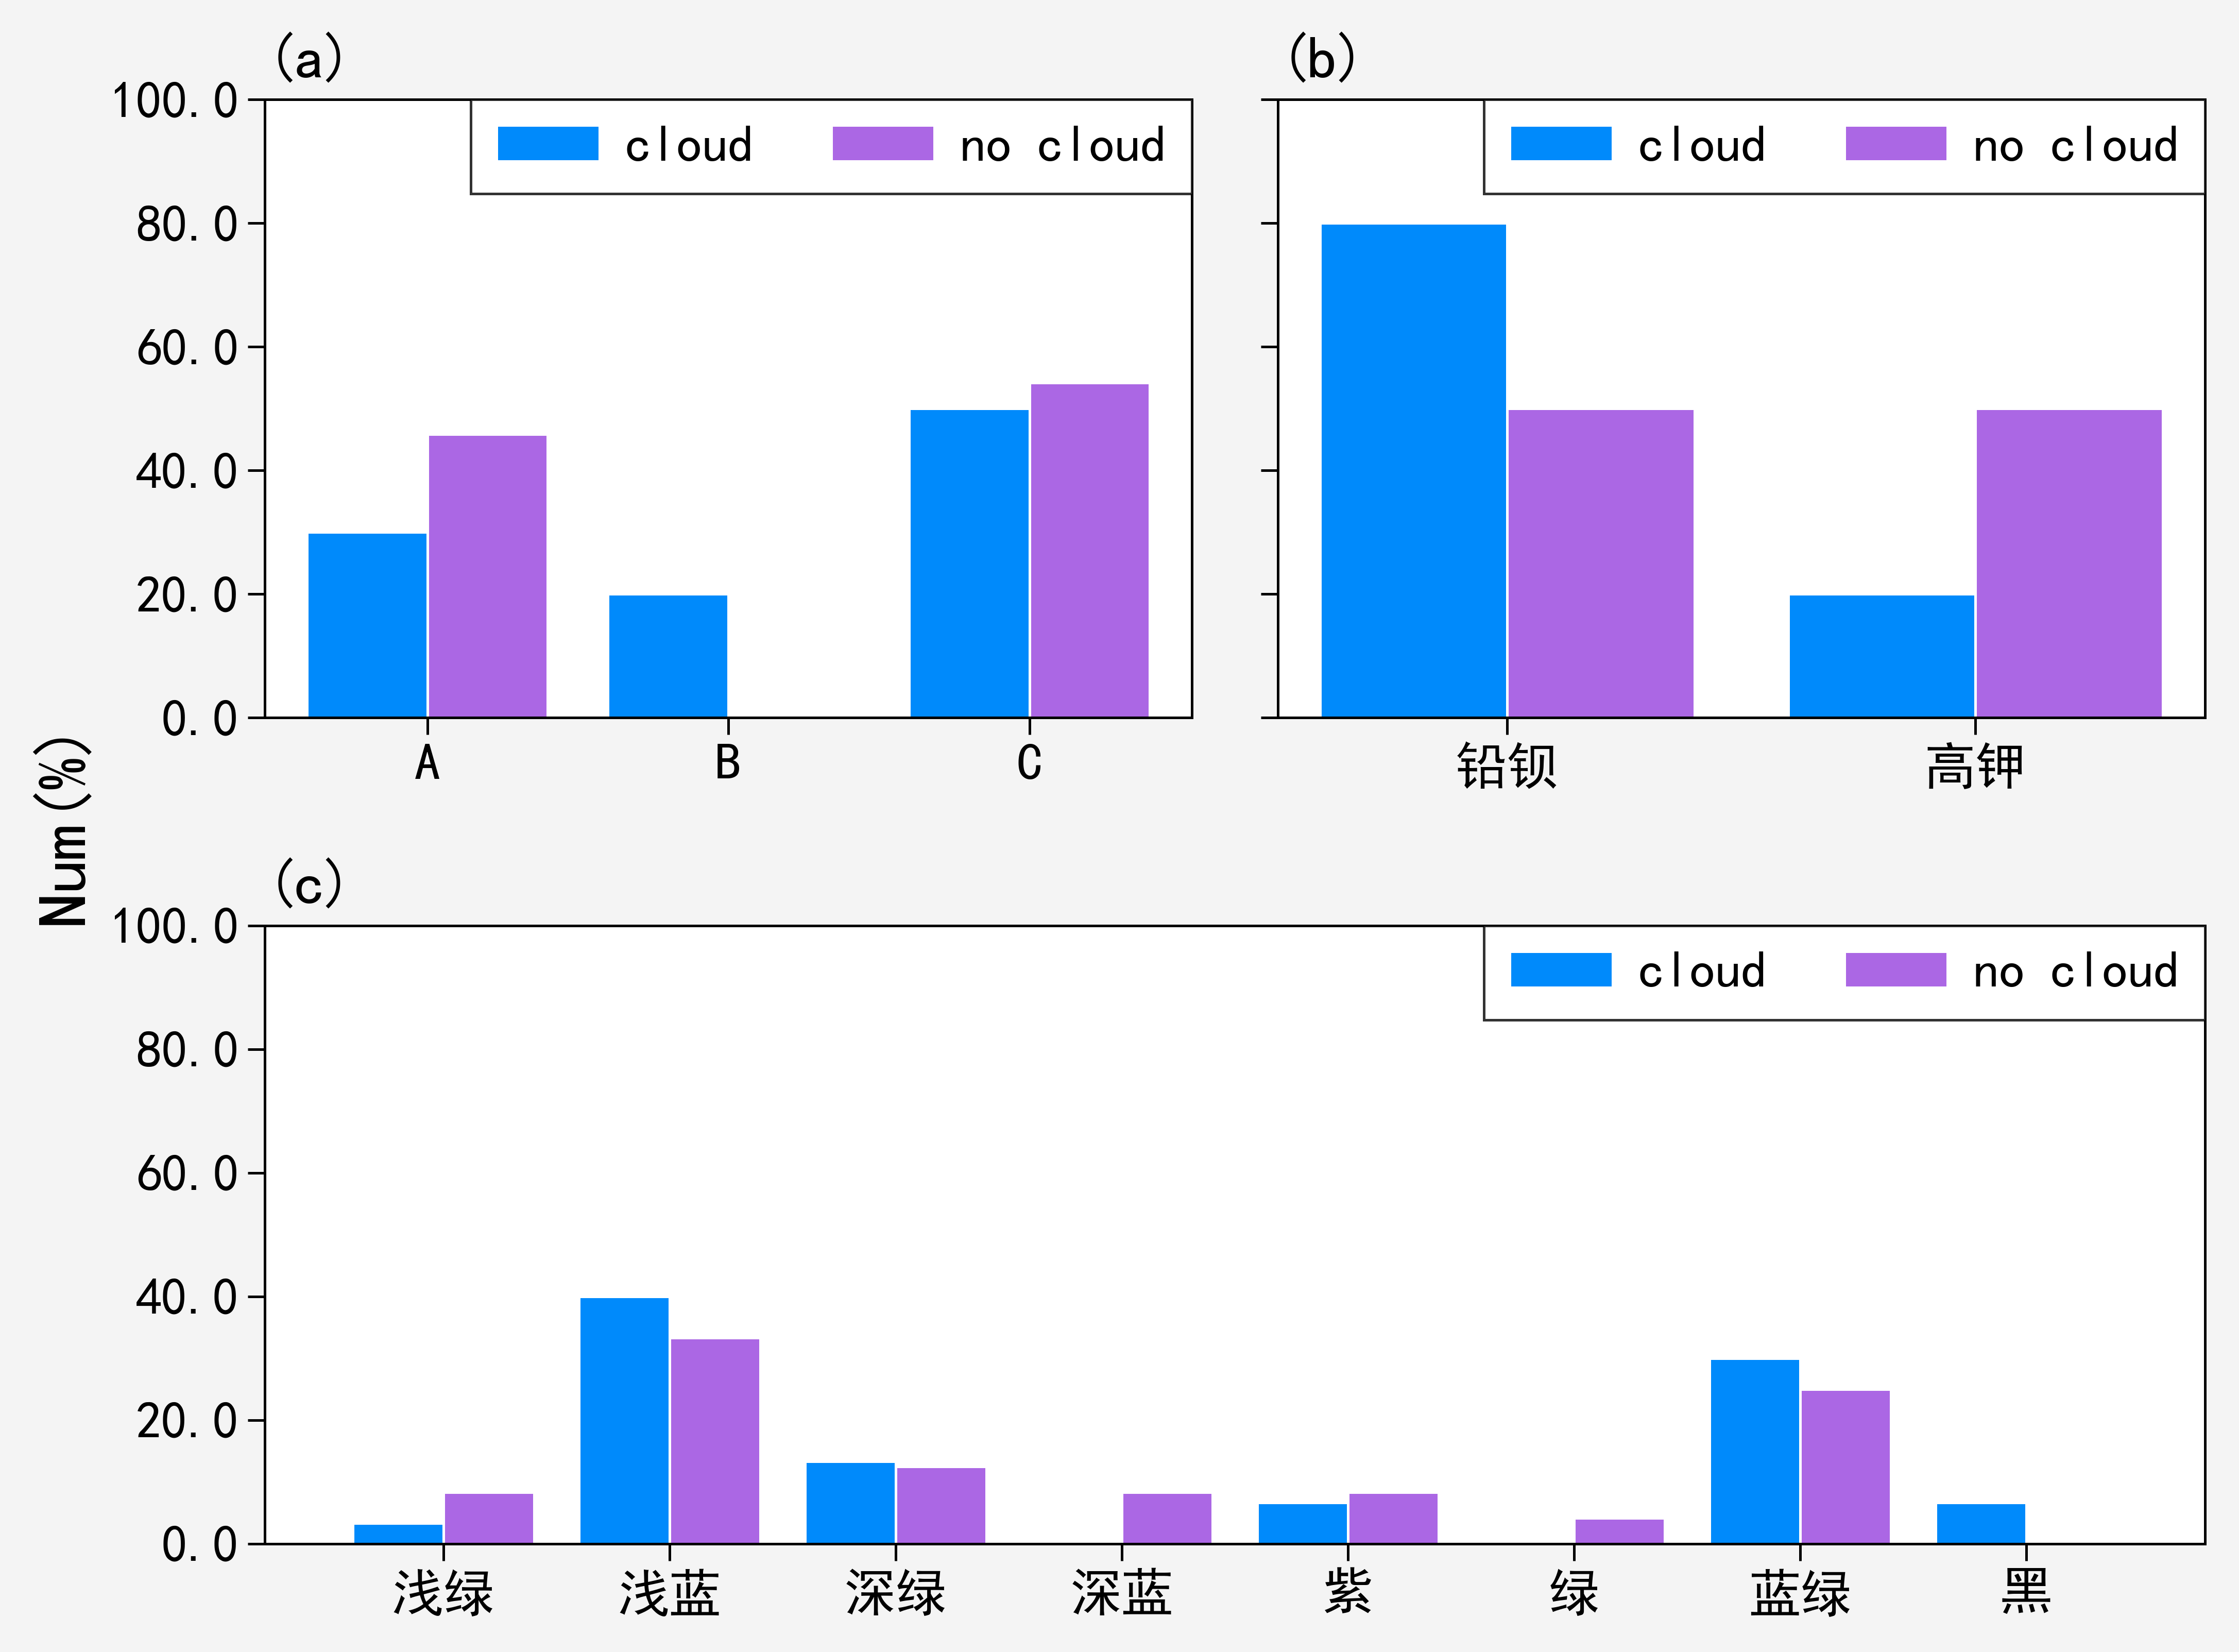

In [8]:
# 绘图  
fig, ax = pplt.subplots([[1,2],[3,3]], refheight= 2,refwidth= 3, dpi= 300,)
ax[0].bar(dec*100, cycle= ['#008afb','#ab67e4'], edgecolor='white')
ax[1].bar(cloud*100,cycle= ['#008afb','#ab67e4'], edgecolor='white')
ax[2].bar(color*100,cycle= ['#008afb','#ab67e4'], edgecolor='white')
# 总体设置
ax.legend(loc='best',ncols=2,  prop={'size': 12})
ax.format(ylim=(0, 100),  ytickminor=False, ylocator=20, yformatter='{x:.1f}',
          ylabel= 'Num(%)',ylabelsize= 16,yticklabelsize= 12,xticklabelsize= 12,
          abc= '(a)', abcsize= 14,grid= False,)
# plt.savefig('../图片/Q1_1_表面风化与其余文本特征统计结果_表1各类占比.png',dpi= 300)

#### 统计分析4类特征

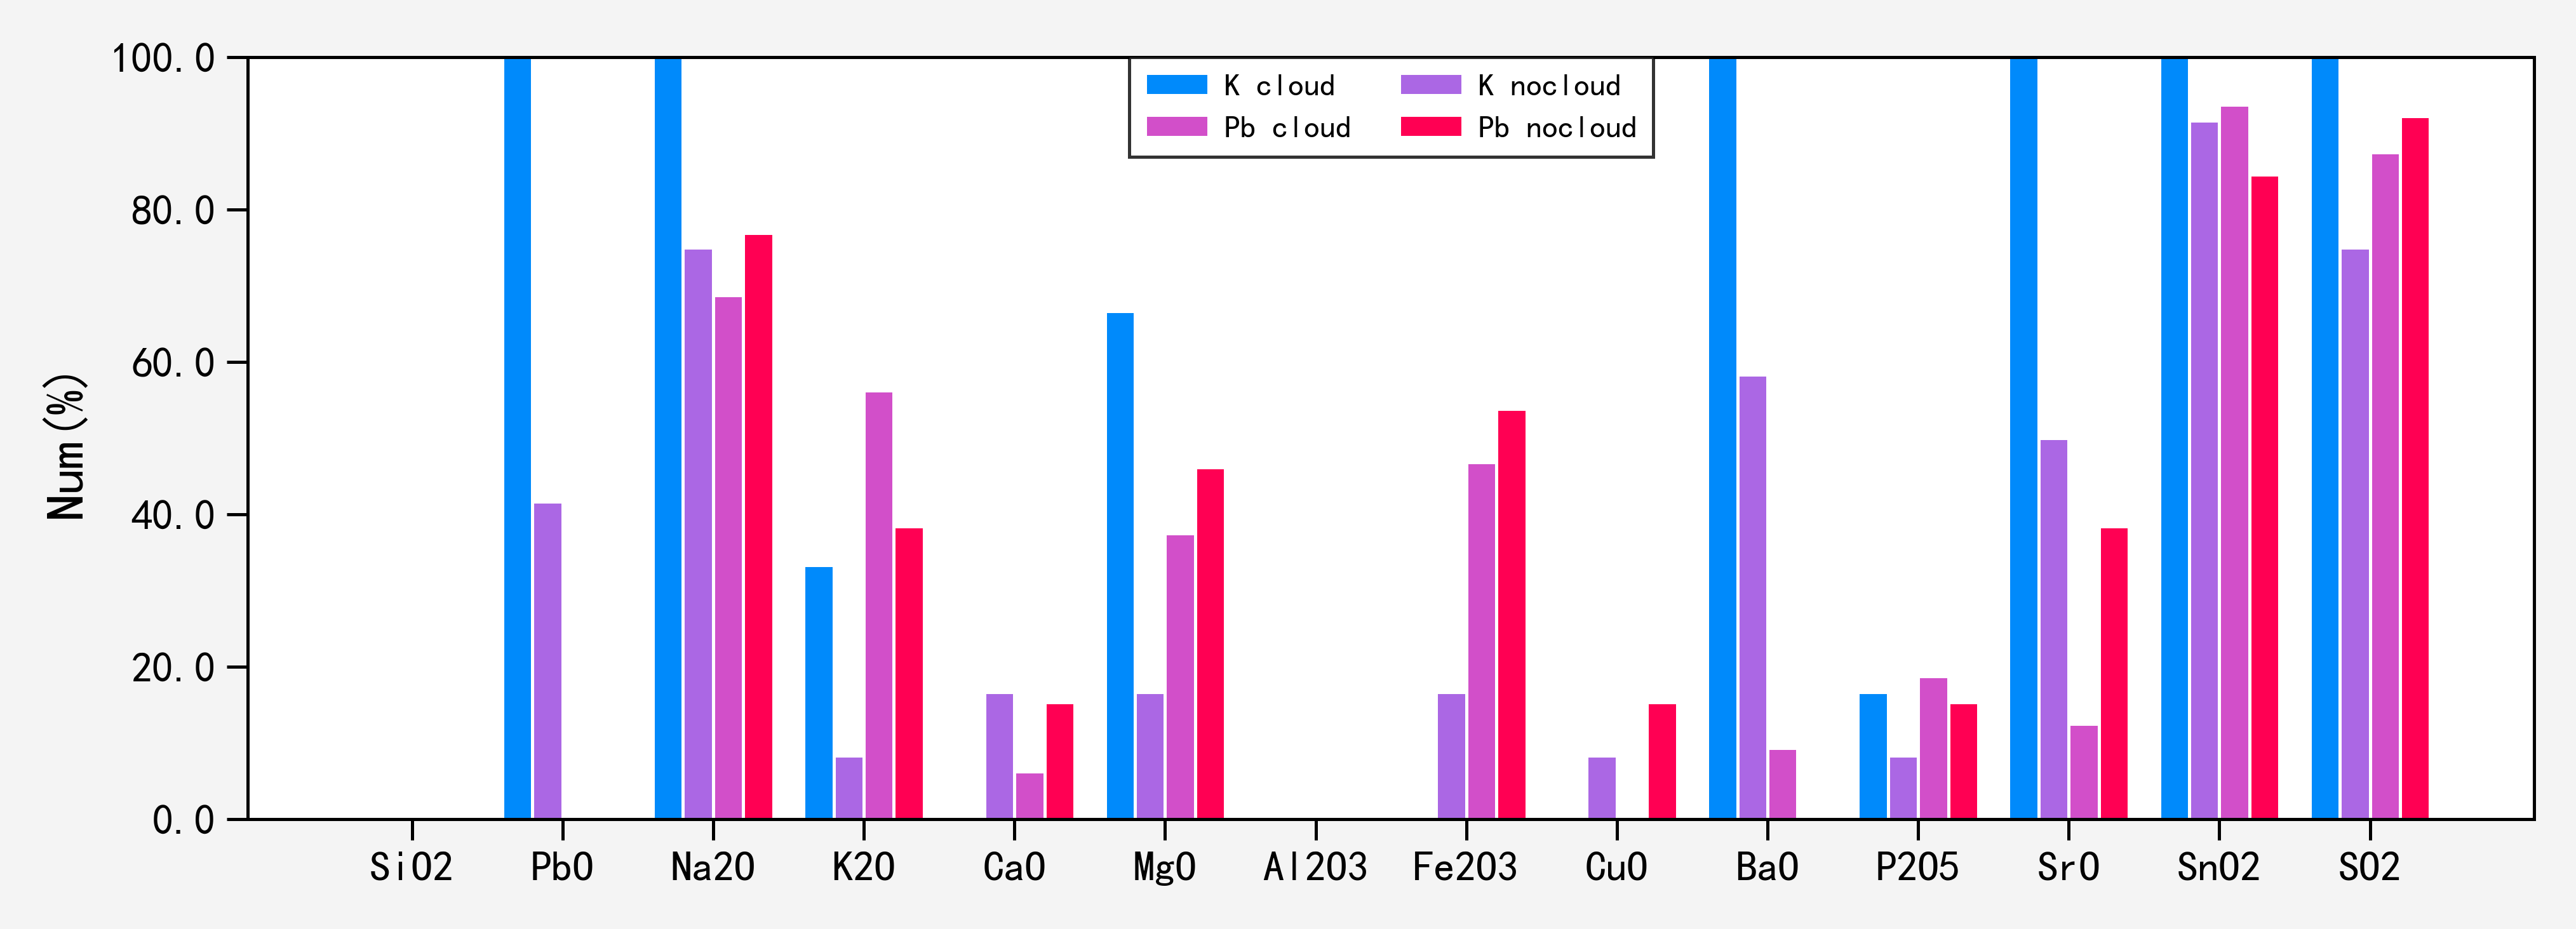

In [9]:
# 数据读取
data = pd.read_excel(r'../数据/附件.xlsx', sheet_name= '表单2').iloc[:, 3:]
# data = data.fillna(0)
# 4类划分
data_K = data[data['类型'] == '高钾']
data_Pb = data[data['类型'] == '铅钡']
data_K_cloud = data_K[data_K['表面风化'] == '风化'].iloc[:, 2:-1]
data_Pb_cloud = data_Pb[data_Pb['表面风化'] == '风化'].iloc[:, 2:-1]
data_K_nocloud = data_K[data_K['表面风化'] == '无风化'].iloc[:, 2:-1]
data_Pb_nocloud = data_Pb[data_Pb['表面风化'] == '无风化'].iloc[:, 2:-1]
# 各成分缺失值数量统计
mean_dis1 = pd.DataFrame(data= {'K cloud':data_K_cloud.isnull().sum()/len(data_K_cloud)*100,
                               'K nocloud':data_K_nocloud.isnull().sum()/len(data_K_nocloud)*100,
                               'Pb cloud':data_Pb_cloud.isnull().sum()/len(data_Pb_cloud)*100,
                               'Pb nocloud':data_Pb_nocloud.isnull().sum()/len(data_Pb_nocloud)*100}, 
                             )
# 绘图
fig, ax = pplt.subplots(refheight= 2, refwidth= 6,dpi= 300)
ax.bar(mean_dis1, cycle= ['#008afb','#ab67e4','#d24fc9','#ff0053'], edgecolor='white')
ax.legend(loc='best',ncols=2,  prop={'size': 6})
ax.format(ylim=(0, 100), ytickminor=False, ylocator=20, yformatter='{x:.1f}',ylabel= 'Num(%)', 
          ylabelsize= 10, yticklabelsize= 8,xticklabelsize= 8, grid= False)
# plt.savefig('../图片/Q1_分类&风化4类_化学成分缺失值占比.png',dpi=300)

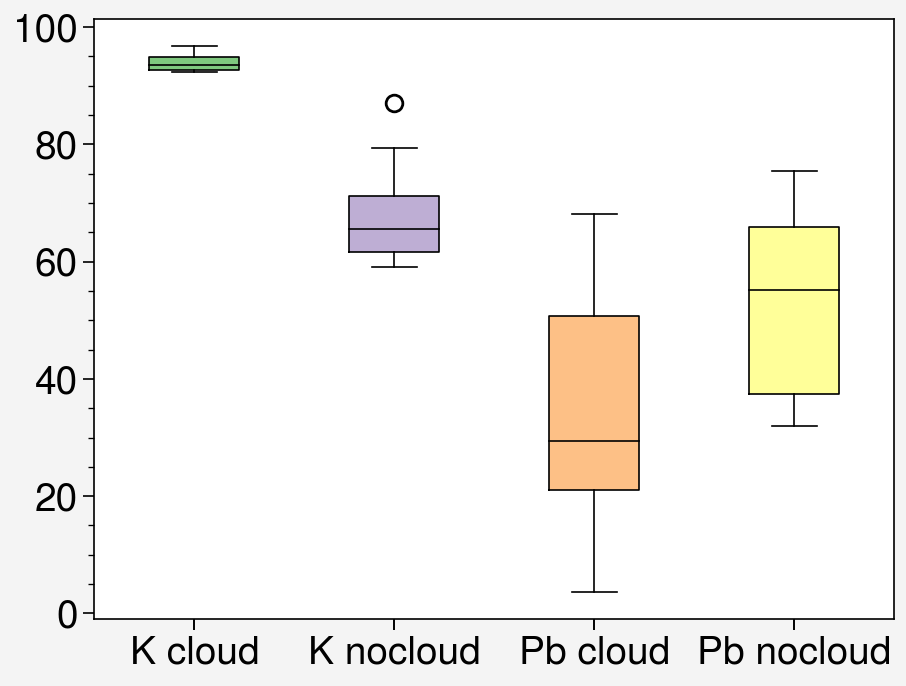

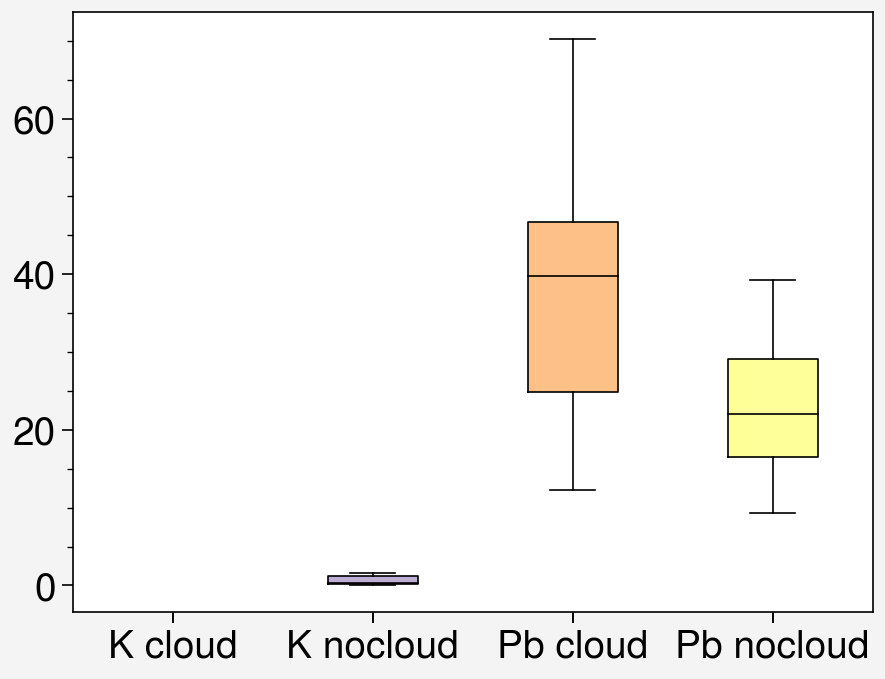

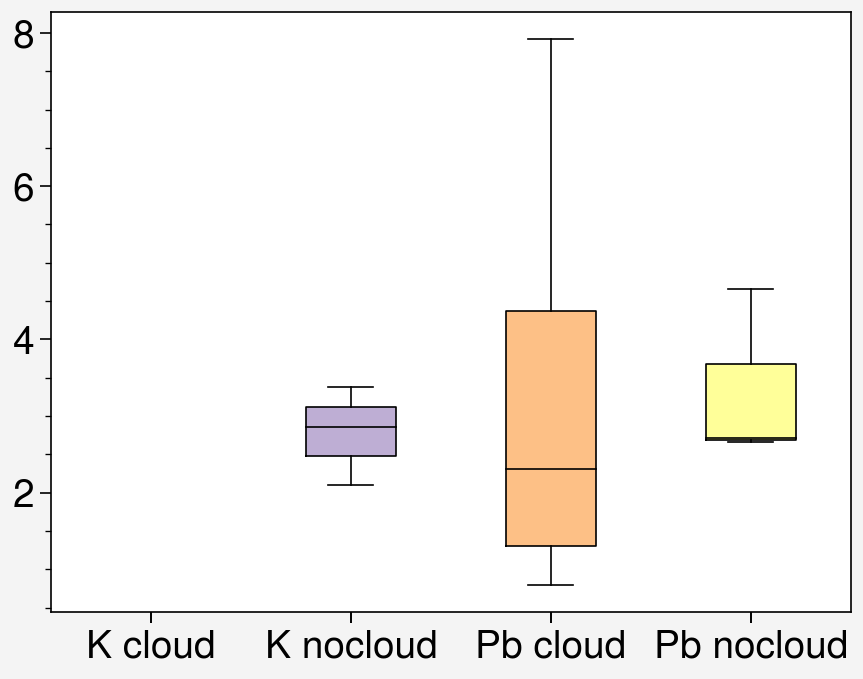

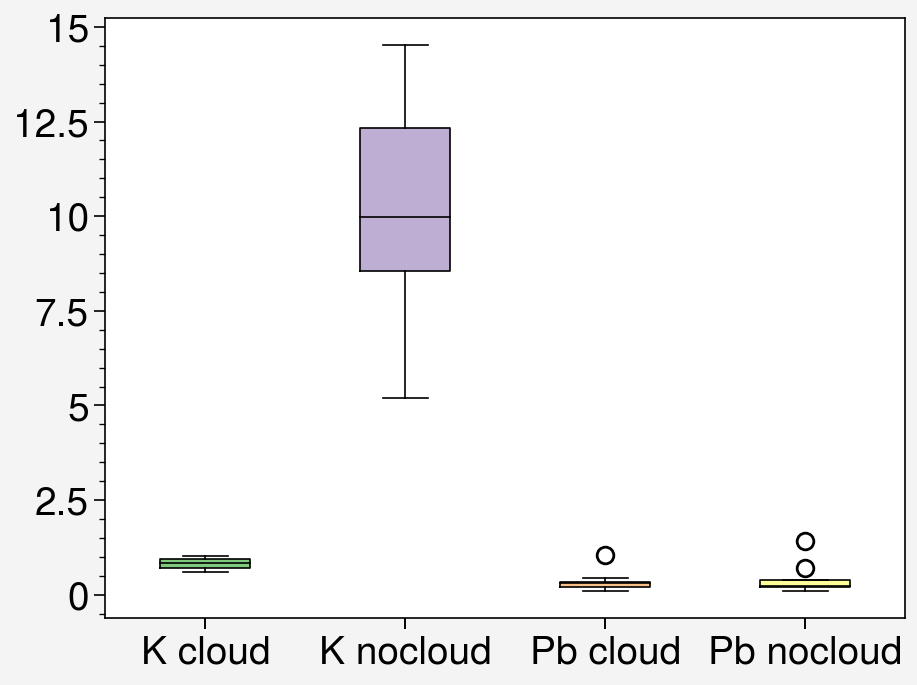

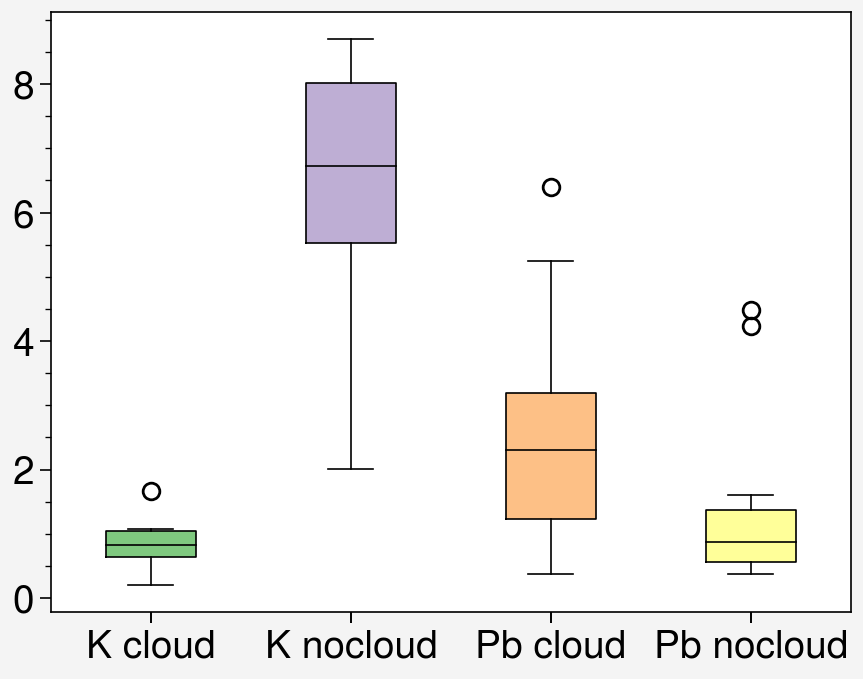

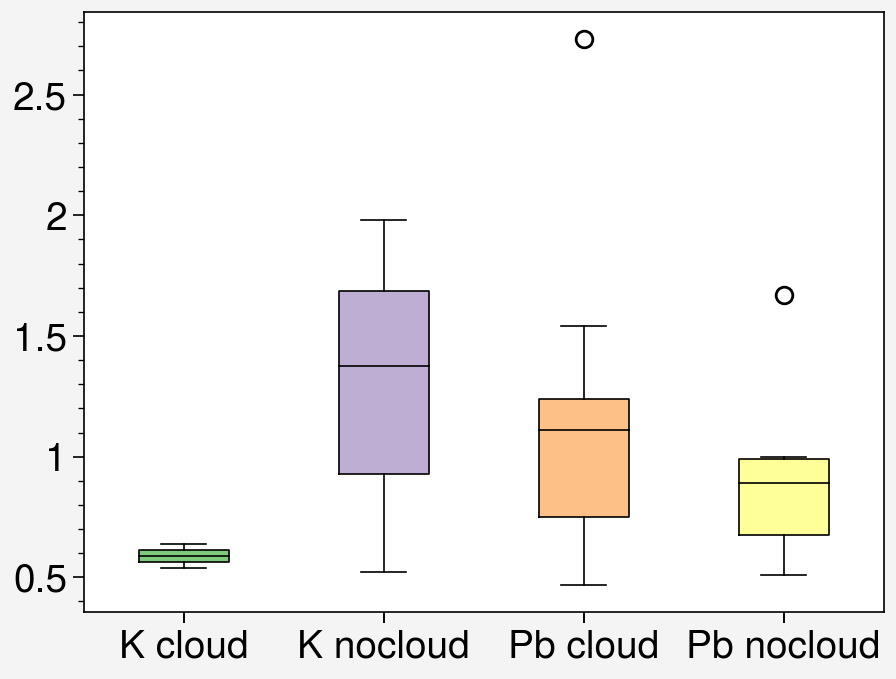

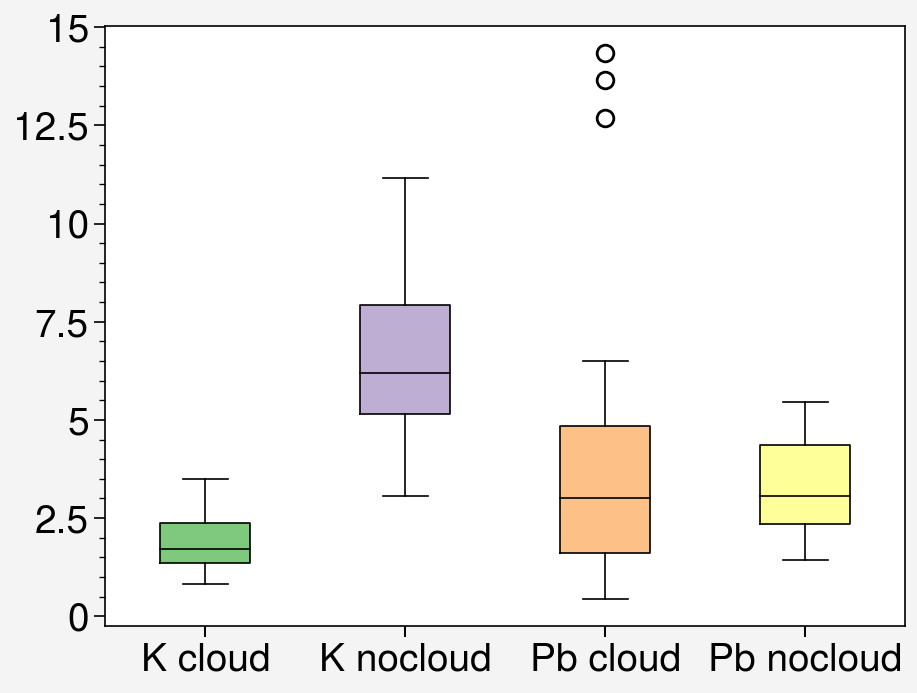

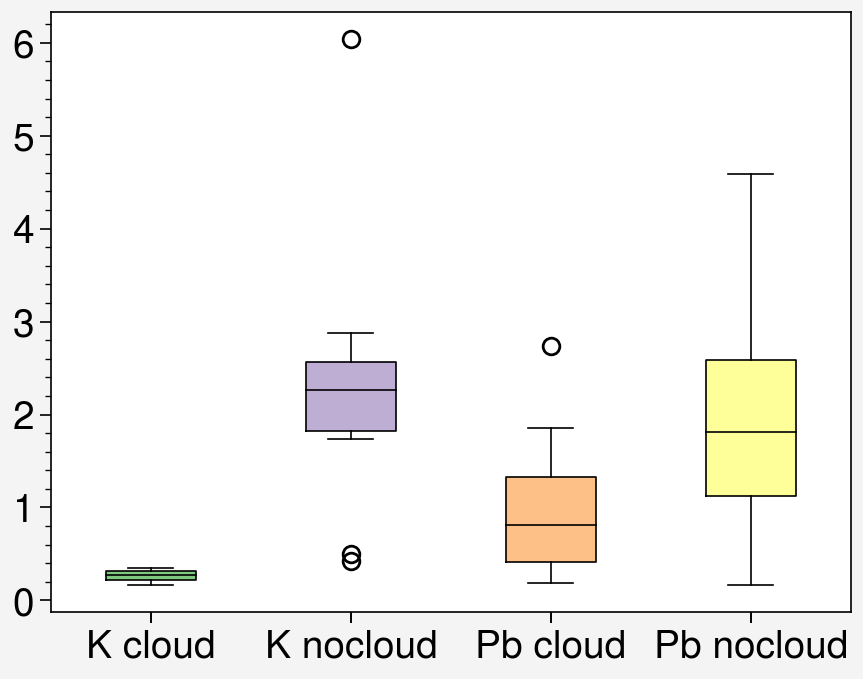

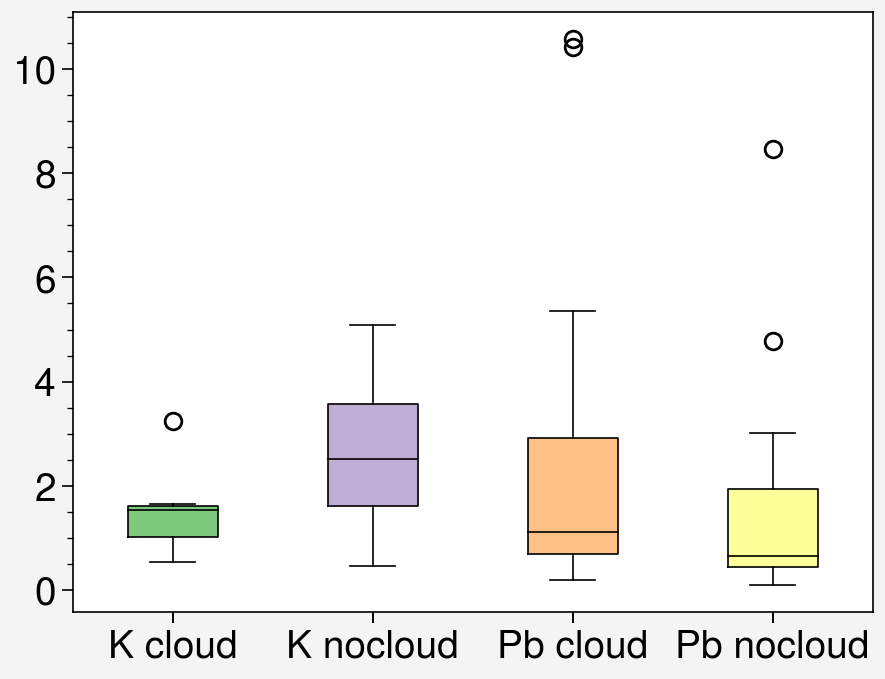

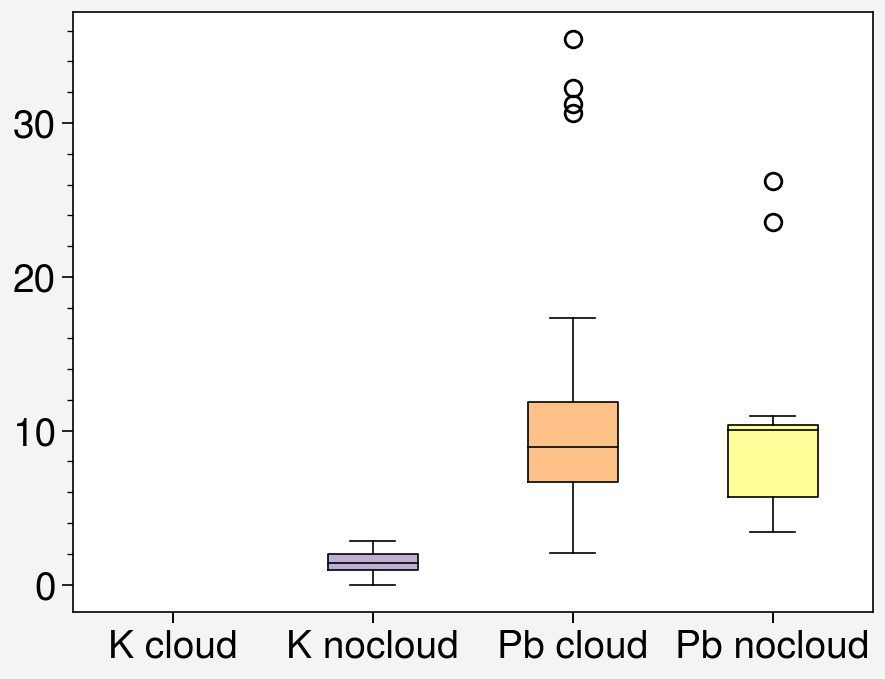

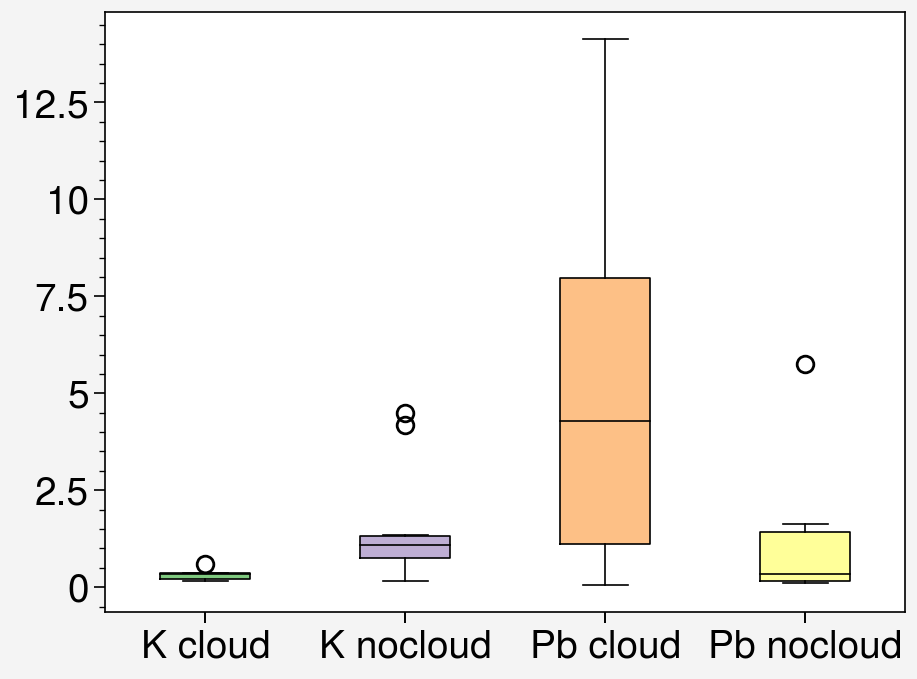

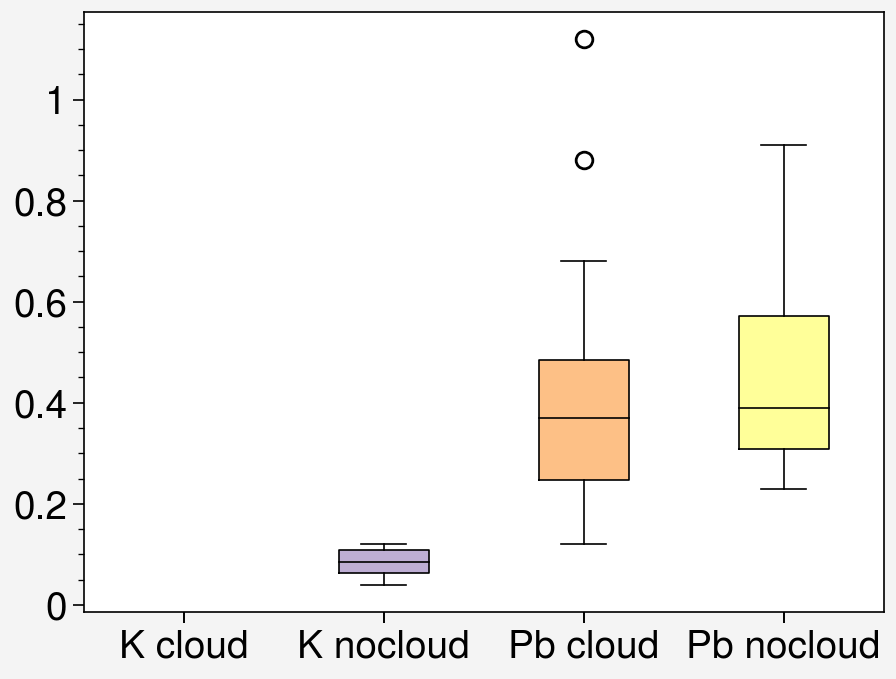

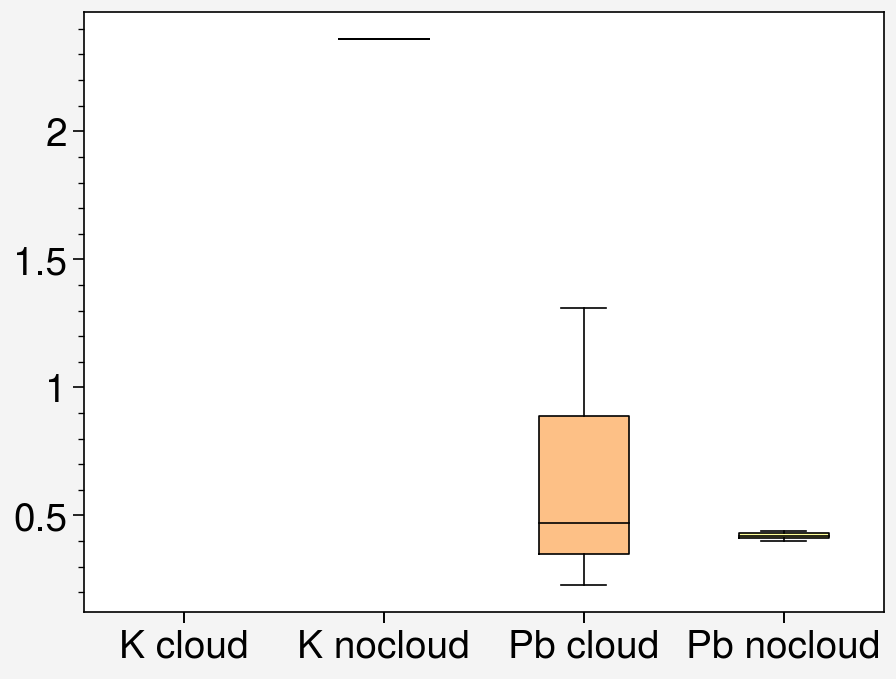

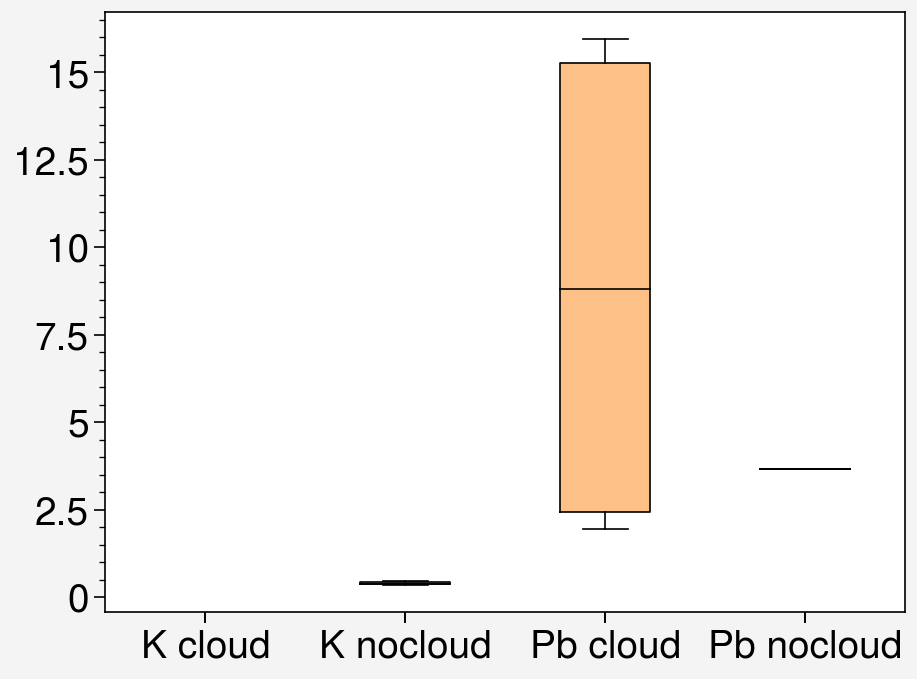

In [64]:
# 箱线图
for i in np.arange(14):
    data_chem_temp = pd.concat([data_K_cloud.iloc[:, i],data_K_nocloud.iloc[:, i],\
                                data_Pb_cloud.iloc[:, i],data_Pb_nocloud.iloc[:, i]], axis=1)
    data_chem_temp.columns = ['K cloud','K nocloud', 'Pb cloud', 'Pb nocloud']
    # 绘图
    fig, ax = pplt.subplots(
                        refheight= 3, 
                        refwidth= 4,  #对单个图而言
                        )
    ax.box(data_chem_temp, cycle= 'Accent')
    ax.format(
          ylabelsize= 16,
          yticklabelsize= 14,
          xticklabelsize= 14,
          grid= False
         )
    # plt.savefig(r'../图片/Q1_2_成分含量统计box_{}.svg'.format(data_K_cloud.iloc[:, i].name), dpi=300)

#### 表单1热编码处理

In [10]:
# 读取数据
data = pd.read_excel(r'../数据/附件.xlsx', sheet_name= '表单1')
# 热编码
data_onehot = pd.get_dummies(data= data.iloc[:, 1:], sparse= False)
data_onehot.index = data.iloc[:, 0]
data_onehot.to_excel(r'../数据/Q1_sheet1_onehot.xlsx')